# 🏠 House Prices Prediction

Predicting house prices using machine learning models (Linear Regression & Random Forest).

This notebook covers:
1. Data Loading
2. Exploratory Data Analysis (EDA)
3. Data Cleaning & Preprocessing
4. Model Training & Evaluation
5. Feature Importance
6. Saving the Best Model


## 1️⃣ Import Libraries

We'll import essential libraries for data analysis, visualization, and machine learning.


In [12]:
# Data & math tools
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Save model
import joblib

# Visualization style
sns.set_style("whitegrid")

## 2️⃣ Load Dataset

Load the training data from the Kaggle "House Prices" dataset.


In [13]:
# Load dataset
df = pd.read_csv('../data/train.csv')  # Adjust path if necessary
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 3️⃣ Exploratory Data Analysis (EDA)

Let's explore the dataset to understand the data types, missing values, and feature correlations.

In [14]:
# Basic info
df.info()

# Check missing values
df.isnull().sum().sort_values(ascending=False).head(10)

# Summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


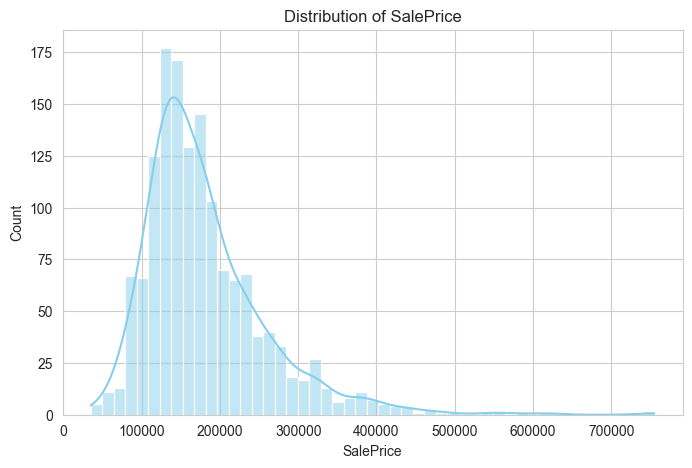

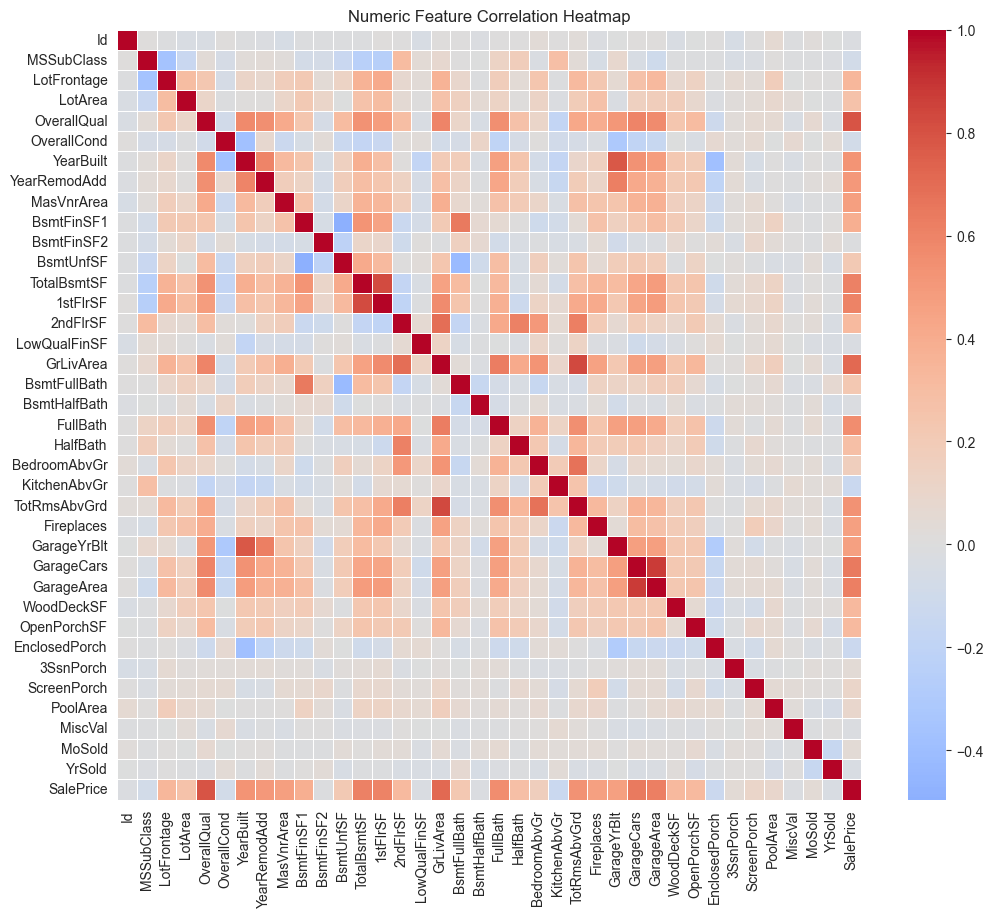

In [20]:
# Distribution of SalePrice
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], kde=True, color='skyblue')
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.show()

# Select numeric columns only
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Numeric Feature Correlation Heatmap")
plt.show()

## 4️⃣ Data Cleaning & Preprocessing

We'll handle missing values and encode categorical features to prepare the data for modeling.


In [16]:
# Numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Verify no missing values
missing = df.isnull().sum().sum()
print(f"✅ Total missing values remaining: {missing}")

✅ Total missing values remaining: 0


## 5️⃣ Split Data into Features & Target, then Train/Test Sets

We'll separate the features (X) from the target (y) and split into training and testing sets.

In [17]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 1168, Testing samples: 292


## 6️⃣ Train & Evaluate Models

We'll train two models:
1. Linear Regression
2. Random Forest Regressor

Then compare their performance using RMSE (Root Mean Squared Error).

In [21]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    rmse = mean_squared_error(y_test, preds) ** 0.5
    print(f"{name}: RMSE = {rmse:.2f}")

Linear Regression: RMSE = 51405.09
Random Forest: RMSE = 28352.11


## 7️⃣ Feature Importance (Random Forest)

Visualize the top 10 most important features influencing house prices.

C:\Users\MSI GF63\AppData\Local\Temp\ipykernel_13676\1818684208.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


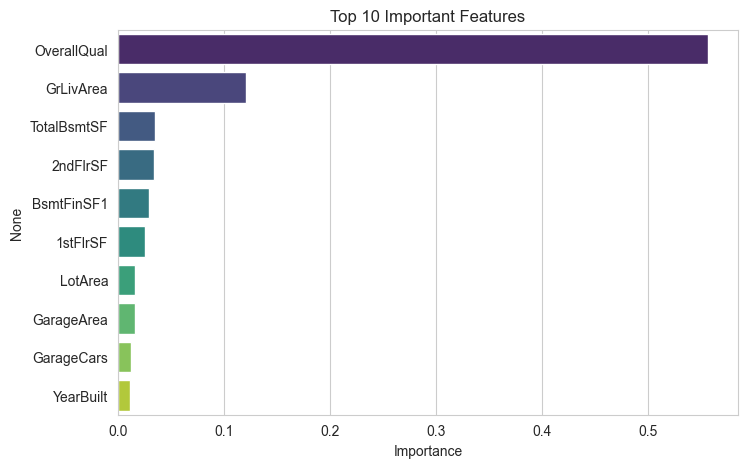

In [22]:
rf = models["Random Forest"]
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.show()

## 8️⃣ Save the Best Model

We'll save the Random Forest model to use later for predictions.

In [23]:
joblib.dump(rf, '../src/house_price_model.pkl')
print("✅ Model saved to src/house_price_model.pkl")

✅ Model saved to src/house_price_model.pkl


## 9️⃣ Summary

- **Best Model:** Random Forest Regressor
- **RMSE:** [Insert your value from previous cell]
- **Top Features:** OverallQual, GrLivArea, GarageCars, etc.
- Dataset is now cleaned, preprocessed, and ready for predictions or deployment.
